In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

In [2]:
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

100%|██████████| 4.63k/4.63k [00:00<00:00, 1.62MB/s]

Extracting files...


In [4]:
house_prices = pd.read_csv(path + '/Housing.csv')

In [5]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
house_prices.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
house_prices.mainroad.value_counts()

,count
mainroad,
yes,468
no,77


In [9]:
house_prices.mainroad.map({'yes':1, 'no': 0})

,mainroad
0,1
1,1
2,1
3,1
4,1
...,...
540,1
541,0
542,1
543,0


In [10]:
house_prices.mainroad = house_prices.mainroad.map({'yes':1, 'no': 0})

In [11]:
house_prices.guestroom = house_prices.guestroom.map({'yes':1, 'no': 0})

In [12]:
house_prices.basement = house_prices.basement.map({'yes':1, 'no': 0})

In [13]:
house_prices.hotwaterheating = house_prices.hotwaterheating.map({'yes':1, 'no': 0})

In [14]:
house_prices.airconditioning = house_prices.airconditioning.map({'yes':1, 'no': 0})

In [15]:
house_prices.prefarea = house_prices.prefarea.map({'yes':1, 'no': 0})

In [16]:
house_prices.furnishingstatus = house_prices.furnishingstatus.map({'unfurnished':1, 'semi-furnished': 2, 'furnished':3})

In [17]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


## Searching for outliers

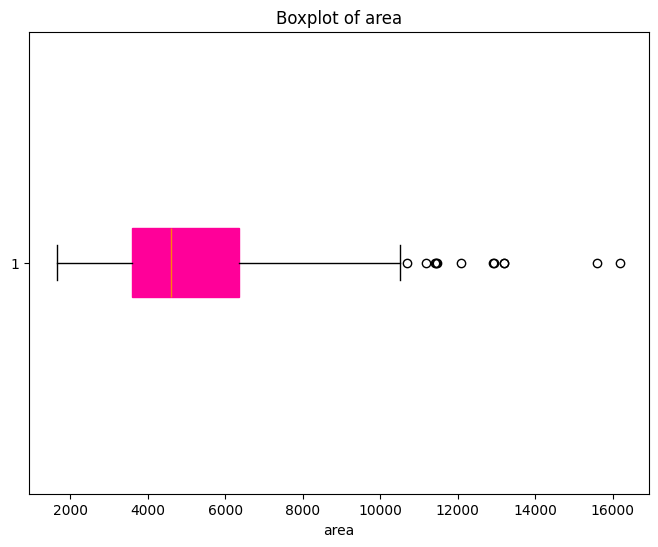

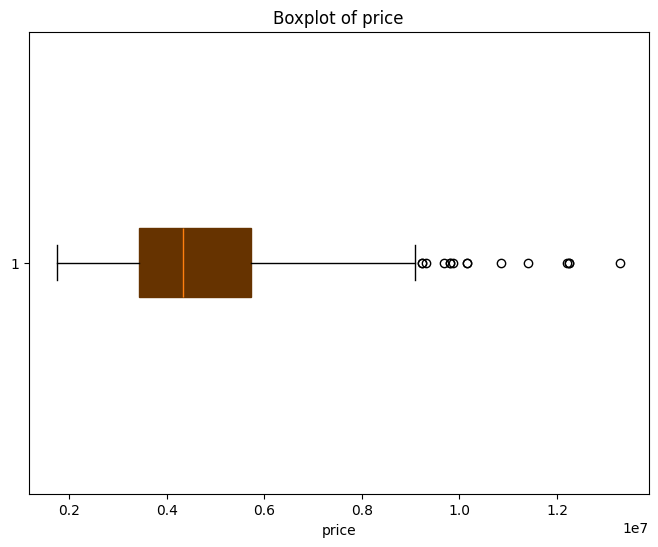

In [19]:
colors = ['#ff0099', '#663300']
check_outliers_columns = ['area', 'price']
for i, color in zip(check_outliers_columns, colors):
  plt.figure(figsize=(8, 6))
  plt.boxplot(house_prices[i], vert=False, patch_artist=True, boxprops=dict(facecolor=color, color=color))
  plt.title(f'Boxplot of {i}')
  plt.xlabel(i)
  plt.show()

## Check correlated columns

In [20]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


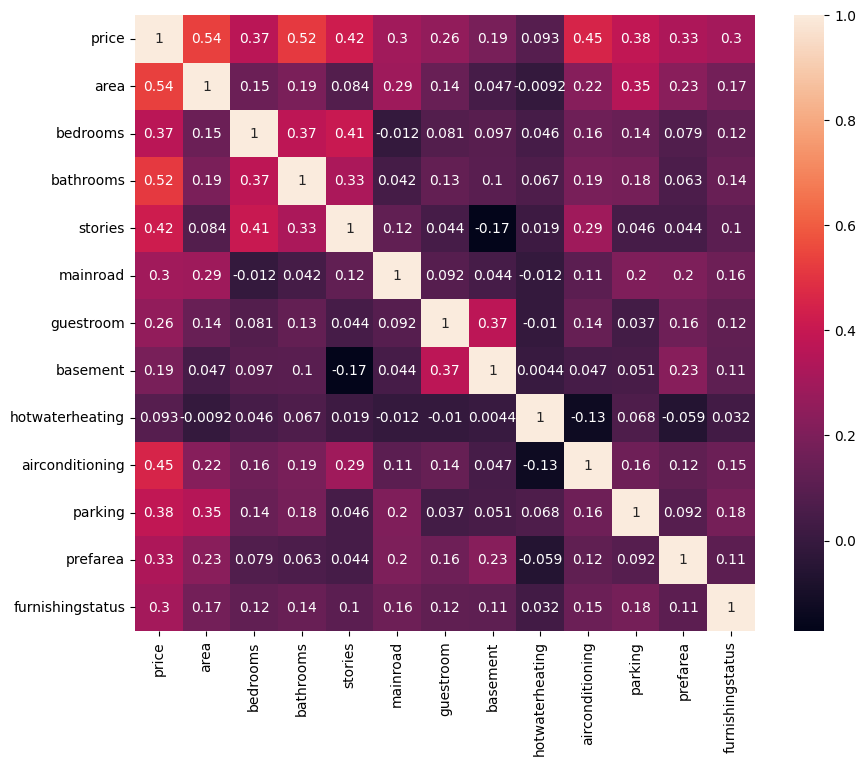

In [21]:
corr_matrix = house_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

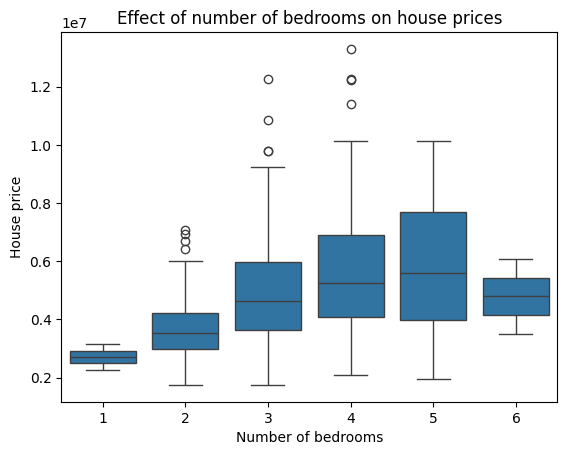

In [22]:
sns.boxplot(x='bedrooms', y='price', data=house_prices)
plt.title("Effect of number of bedrooms on house prices")
plt.xlabel('Number of bedrooms')
plt.ylabel('House price')
plt.show()

## Impartim setul de date

In [23]:
X = house_prices.drop(columns=['price'])
y = house_prices['price']

In [24]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,3


In [25]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
## Impartim initial in set de antrenare + validare si set de testare
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
## Setul de antrenare + validare il impartim in antrenare si validare
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

* Cross validation
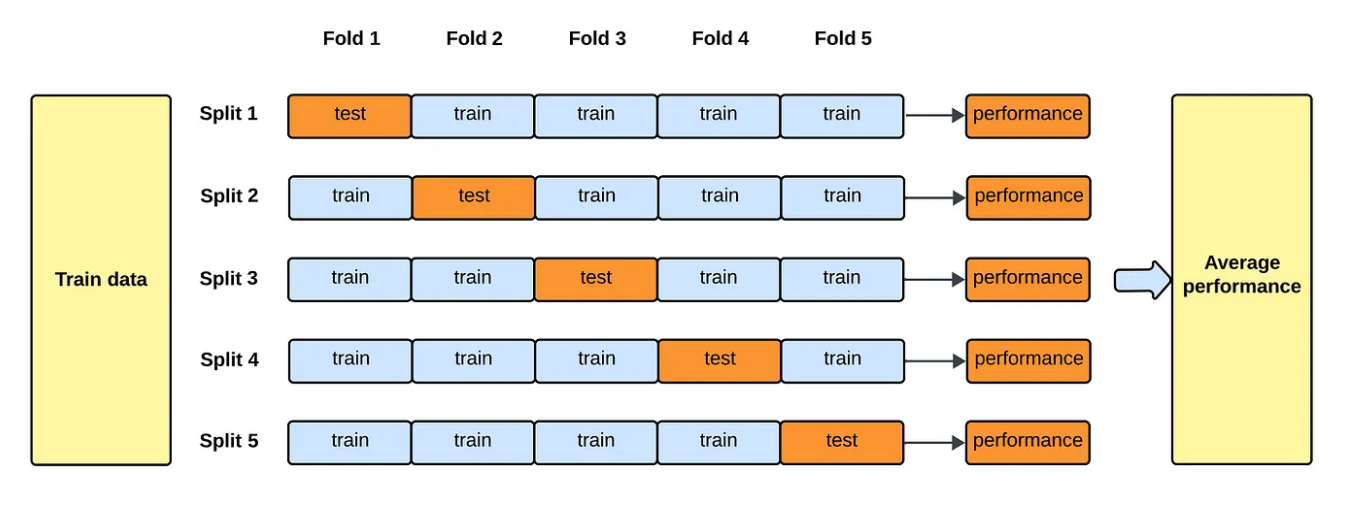

* Setul de date este impartit in k subseturi de dimensiuni aproximativ egale
* Modelul este antrenat pe k-1 fold-uri testat pe foldul ramas
* Se repeta pentru fiecare fold, astfel incat fiecare fold sa fie utilizat o data ca set de testare
* Performanta modelului este masurata pentru fiecare fold(MSE, Acuratete)
* Rezultatul final este media performantei obtinute pe toate fold-urile

In [29]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [30]:
X_train_scaled

array([[ 1.15328999,  1.32200557,  1.41960509, ...,  0.33443618,
        -0.53564898,  0.07837503],
       [-0.21260041,  1.32200557, -0.57569239, ...,  0.33443618,
        -0.53564898,  1.40639644],
       [ 0.10824633,  1.32200557, -0.57569239, ..., -0.79893087,
        -0.53564898,  0.07837503],
       ...,
       [ 2.44584399,  1.32200557,  1.41960509, ...,  0.33443618,
        -0.53564898,  0.07837503],
       [-0.35010616,  0.03378928, -0.57569239, ..., -0.79893087,
        -0.53564898, -1.24964637],
       [ 0.38325782,  0.03378928,  1.41960509, ..., -0.79893087,
         1.86689424,  0.07837503]])

In [31]:
y_train_scaled

array([[ 1.40003062],
       [ 0.49455811],
       [ 0.10087441],
       [ 0.94729437],
       [-1.25733435],
       [ 1.32129388],
       [ 0.4512529 ],
       [ 0.10087441],
       [-0.48965113],
       [-0.09596744],
       [-0.68649298],
       [-1.19828179],
       [-0.72586135],
       [-0.09596744],
       [-1.27701853],
       [ 2.26613476],
       [-0.13533581],
       [ 0.13236911],
       [-0.84396646],
       [ 0.60872638],
       [ 1.59687247],
       [-1.23765016],
       [-0.15501999],
       [ 0.27803208],
       [ 0.10087441],
       [-0.48965113],
       [ 0.15992697],
       [-0.60775624],
       [ 2.89602867],
       [-0.88333483],
       [ 0.65203159],
       [-0.84396646],
       [-0.68649298],
       [ 0.06150604],
       [-0.61169308],
       [-0.82428228],
       [-0.82428228],
       [-0.29280929],
       [-0.68649298],
       [-0.53295634],
       [-0.03691488],
       [-0.76522972],
       [ 0.76619986],
       [-0.70617717],
       [ 0.69139996],
       [ 0

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cross_val_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_squared_error') ## CV cu 5 folduri
print(f"Cross-Validation MSE Scores: {-cross_val_scores}")
print(f" Mean Cross-Validation MSE: {np.mean(-cross_val_scores)}")


Cross-Validation MSE Scores: [0.42635014 0.28161705 0.30106889 0.40791406 0.29783258]
 Mean Cross-Validation MSE: 0.3429565438142984


## Validare

In [34]:
model.fit(X_train_scaled, y_train_scaled)
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = model.predict(X_val_scaled)

In [35]:
y_val_scaled

array([[ 0.44997614],
       [-0.94859779],
       [-1.05578789],
       [-0.37717398],
       [ 0.54685334],
       [-0.51746108],
       [-0.08420956],
       [ 0.7205667 ],
       [ 0.96715901],
       [ 0.39577412],
       [ 0.08340029],
       [ 0.28199299],
       [-0.46239328],
       [ 0.78610389],
       [-0.91590734],
       [-0.48558905],
       [ 1.08227978],
       [ 0.69365933],
       [ 0.8904167 ],
       [-0.79429289],
       [-0.68813868],
       [-0.27381453],
       [-0.33065247],
       [-0.12998101],
       [ 0.75822167],
       [ 0.24338453],
       [-0.34146492],
       [-1.47315043],
       [ 0.57696504],
       [ 0.28097115],
       [-0.75133214],
       [ 0.89076816],
       [ 0.00314986],
       [ 1.14213339],
       [ 0.78188132],
       [-0.04621053],
       [-1.10459861],
       [ 0.59458819],
       [ 1.15179831],
       [-0.81716994],
       [-1.11292117],
       [ 0.15129997],
       [ 1.29577259],
       [-0.75419284],
       [ 0.78339552],
       [ 0

In [36]:
y_val

,price
328,3990000
502,2660000
351,3780000
406,3465000
128,5873000
...,...
470,3010000
434,3290000
539,1855000
157,5495000


In [37]:
y_val_rescaled = scaler_y.inverse_transform(y_val_scaled)

In [38]:
y_val_rescaled

array([[5520729.8212697 ],
       [3033957.43467206],
       [2843365.1639508 ],
       [4049993.05470254],
       [5692984.9492756 ],
       [3800551.77016394],
       [4570906.4084968 ],
       [6001860.70838045],
       [6440320.87489033],
       [5424354.44385101],
       [4868929.6536628 ],
       [5222042.80686551],
       [3898466.57064672],
       [6118390.90059638],
       [3092083.56054267],
       [3857222.70593085],
       [6645014.48682266],
       [5954017.33631827],
       [6303867.12429947],
       [3308323.45285776],
       [3497073.83099825],
       [4233774.14660919],
       [4132711.89133337],
       [4489521.24954303],
       [6068814.14847556],
       [5153393.97774432],
       [4113486.53268205],
       [2101262.35581947],
       [5746525.88683362],
       [5220225.88957211],
       [3384710.97955142],
       [6304492.04189789],
       [4726238.20764715],
       [6751438.82432886],
       [6110882.8313344 ],
       [4638471.61389676],
       [2756575.92529507],
 

## Testare Model

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val_rescaled, y_val)
r2 = r2_score(y_val_rescaled, y_val)

In [40]:
mse

1028503745081.091

In [41]:
r2

0.5350087915584051

In [42]:
X_test.iloc[:1]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,1


In [43]:
## Primul pas este sa aducem intrarea la formatul datelor cu care modelul a fost antrenat
test_input_scale = scaler_X.transform(X_test.iloc[:1])

In [44]:
test_input_scale

array([[ 0.33742257,  1.32200557,  1.41960509,  0.22798113, -2.65071986,
        -0.44280744,  1.40041603, -0.24295633, -0.67773899,  0.33443618,
        -0.53564898, -1.24964637]])

In [45]:
test_price = scaler_y.inverse_transform(model.predict(test_input_scale))

In [46]:
test_price

array([[5220973.18882229]])

In [47]:
y_test.iloc[:1]
## Acest model LinearRegression foloseste OLS, deci nu are acei parametri discutati la gradient descent: learning rate, epsilon etc

,price
316,4060000


## SGDRegressor

In [48]:
from sklearn.linear_model import SGDRegressor
grad_regressor = SGDRegressor(max_iter=200, learning_rate='constant', tol=1e-8, eta0=0.01)

In [49]:
grad_regressor.fit(X_train_scaled, y_train_scaled.reshape(-1))

SGDRegressor(learning_rate='constant', max_iter=200, tol=1e-08)

In [50]:
test_input_scale = scaler_X.transform(X_test.iloc[:1])
test_price = scaler_y.inverse_transform(grad_regressor.predict(test_input_scale).reshape(1, -1))

In [51]:
test_price

array([[5052576.12729751]])

## Vizualizare si creare grafic al pierderii

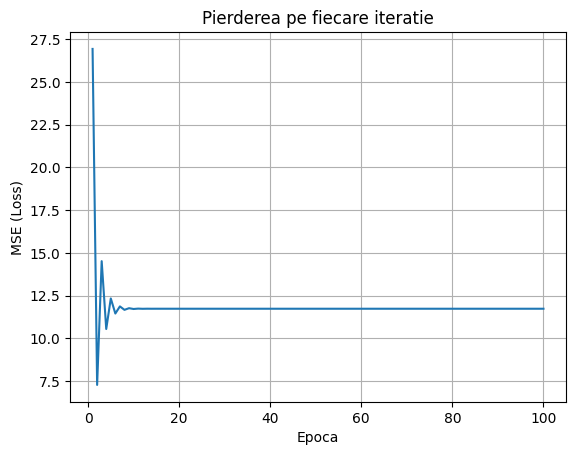

In [56]:
import warnings
warnings.filterwarnings("ignore")


grad_regressor_step = SGDRegressor(max_iter=1, warm_start=True, learning_rate='constant', tol=1e-2, eta0=0.1, penalty = None, random_state=42)
losses = []
## Iteram manual si calculam pierderea
for epoch in range(100):
  grad_regressor_step.fit(X_train_scaled, y_train_scaled.reshape(-1))
  y_pred = grad_regressor_step.predict(X_train_scaled)
  loss = np.mean((y_pred - y_train_scaled)**2)
  losses.append(loss)


plt.plot(range(1, len(losses) + 1) , losses)
plt.title('Pierderea pe fiecare iteratie')
plt.xlabel('Epoca')
plt.ylabel('MSE (Loss)')
plt.grid()
plt.show()

## Schimbare model la nivel de date

In [61]:
house_prices.area = np.round(np.log(house_prices.area * 0.092903), 3)

In [65]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,16.403275,6.536,4,2,3,1,0,0,0,1,2,1,3
1,16.321036,6.724,4,4,4,1,0,0,0,1,3,0,3
2,16.321036,6.830,3,2,2,1,0,1,0,0,2,1,2
3,16.318175,6.546,4,2,2,1,0,1,0,1,3,1,3
4,16.250001,6.536,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,14.414347,5.630,2,1,1,1,0,1,0,0,2,0,1
541,14.384879,5.407,3,1,1,0,0,0,0,0,0,0,2
542,14.375126,5.818,2,1,1,1,0,0,0,0,0,0,1
543,14.375126,5.600,3,1,1,0,0,0,0,0,0,0,3


In [64]:
house_prices.price = np.log(house_prices.price)

In [66]:
X = house_prices.drop(columns=['price'])
y = house_prices['price']

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6.536,4,2,3,1,0,0,0,1,2,1,3
1,6.724,4,4,4,1,0,0,0,1,3,0,3
2,6.830,3,2,2,1,0,1,0,0,2,1,2
3,6.546,4,2,2,1,0,1,0,1,3,1,3
4,6.536,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,5.630,2,1,1,1,0,1,0,0,2,0,1
541,5.407,3,1,1,0,0,0,0,0,0,0,2
542,5.818,2,1,1,1,0,0,0,0,0,0,1
543,5.600,3,1,1,0,0,0,0,0,0,0,3


In [68]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

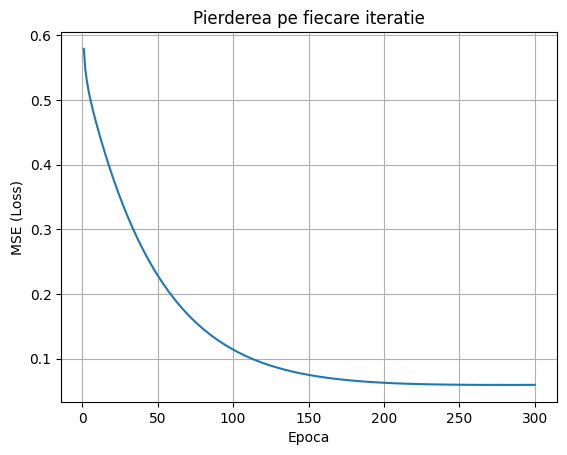

In [72]:
import warnings
warnings.filterwarnings("ignore")


grad_regressor_step = SGDRegressor(max_iter=1, warm_start=True, learning_rate='constant', tol=1e-4, eta0=0.01, penalty = None, random_state=42)
losses = []
## Iteram manual si calculam pierderea
for epoch in range(300):
  grad_regressor_step.fit(X_train, y_train)
  y_pred = grad_regressor_step.predict(X_train)
  loss = np.mean((y_pred - y_train)**2)
  losses.append(loss)


plt.plot(range(1, len(losses) + 1) , losses)
plt.title('Pierderea pe fiecare iteratie')
plt.xlabel('Epoca')
plt.ylabel('MSE (Loss)')
plt.grid()
plt.show()

In [73]:
X_test.iloc[:1]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,6.307,4,2,2,0,0,1,0,0,1,0,1


In [74]:
y_pred_test = grad_regressor_step.predict(X_test.iloc[:1])


In [75]:
y_pred_test

array([15.6155789])

In [76]:
np.exp(y_pred_test)

array([6050060.91782759])

In [77]:
y_test.iloc[0]

15.216693531577915

In [78]:
np.exp(15.216693531577915)

4059999.9999999995